# Data Analytic Final Submission with Bike Sharing Dataset
## Created By:
- ### Name: Hendra
- ### Email: hendradrakho@gmail.com

## Defining Business Questions
* ### In what season are there most bicycle rentals? <br>
* ### At what time are the most and least bicycle rentals? <br>
* ### How many people choose registered compared to casual? <br>
* ### How has the company's sales performance been in recent years? <br>
* ### What indicators influence the number of bike rentals?

## Import All Needed Library

In [517]:
cd /content

/content


In [518]:
pwd

'/content'

In [519]:
mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [520]:
mkdir dashboard

mkdir: cannot create directory ‘dashboard’: File exists


In [521]:
# Initialize All Needed Libary
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile as zf
import kagglehub
import shutil

## Initialize file location and parrent directory

In [522]:
# Initialize file location and parrent directory
dataset = "lakshmi25npathi/bike-sharing-dataset"
parrent_dataset_dir = "./dataset/"
parrent_dashboard_dataset_dir = "./dashboard/"

day_dataset = parrent_dataset_dir + "day.csv"
hours_dataset = parrent_dataset_dir + "hour.csv"

day_clean_dataset = parrent_dashboard_dataset_dir + "days_bike_rent_clean.csv"
hours_clean_dataset = parrent_dashboard_dataset_dir + "hours_bike_rent_clean.csv"


In [523]:
# Download latest version
compressed_dataset = kagglehub.dataset_download(dataset)

print("Path to dataset files:", compressed_dataset)

Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


In [524]:
# make function to extract zip files or copy it from kaggle download directory if dataset not compressed
def extract_or_copy(zip_dir, extract_dir):
    try:
        if zip_dir.endswith('.zip'):
            with zf.ZipFile(zip_dir, 'r') as extract_dataset:
                extract_dataset.extractall(extract_dir)
            print('Data Extraction Success')

        elif os.path.isdir(zip_dir):
            shutil.copytree(zip_dir, extract_dir, dirs_exist_ok=True)
            print('Directory Copy Success')

        else:
            print('Invalid input path: ZIP file or a directory Not Found')

    except FileNotFoundError:
        print('Dataset Not Found')
    except Exception as e:
        print(f'Data Extraction failed: {e}')
    finally:
        print('End the process')


In [525]:
extract_or_copy(compressed_dataset, parrent_dataset_dir)

Directory Copy Success
End the process


## Data Wrangling

### Data Gathering

In [526]:
# Load a Day Bike Rent Dataset
days_bike_rent_df = pd.read_csv(day_dataset)
days_bike_rent_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [527]:
# Load an Hour Bike Rent Dataset
hours_bike_rent_df = pd.read_csv(hours_dataset)
hours_bike_rent_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [528]:
# Checking data type from eatch column if it included in hours_bike_rent_df and days_bike_rent_df.
hours_bike_rent_df.info()
days_bike_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [529]:
# checking missing value in dataset hours_bike_rent_df
hours_bike_rent_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [530]:
# checking missing value in dataset days_bike_rent_df
days_bike_rent_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


from this explanation, there is no missing or null value in dataframe hours_bike_rent_df or days_bike_rent_df

In [531]:
# Checking Data Duplication
print("Hourly Dataset Missing Value QTY: ", hours_bike_rent_df.duplicated().sum())
print("Daily Dataset Missing Value QTY: ", days_bike_rent_df.duplicated().sum())

Hourly Dataset Missing Value QTY:  0
Daily Dataset Missing Value QTY:  0


From Code above, there is no data duplication

In [532]:
# check the statistical parameters of the numeric column contained in days_bike_rent_df
days_bike_rent_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [533]:
# check the statistical parameters of the numeric column contained in hours_bike_rent_df
hours_bike_rent_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Data Cleaning


* we will delete the instant and workingday columns. For working days, in my opinion, it is already represented by weekdays, and for instant there is no connection. <br>
* Here we will use the int data type as category in the columns 'season', 'month', 'holiday', 'weekday', 'weathersit' because they all have data with several variants <br>
  **Categorical data** is a collection of information in the form of groups. <br>
* we will handle the dteday data type which was previously 'object', we will change it to 'datetime'. <br>
* Rename columns to make them easier to read. <br>
* Convert column contents for easy understanding. <br>
* Create a new column called category_days which shows the contents of the column weekend or weekdays. <br>

#### Remove Irrelevant Columns

In [534]:
# delete instant and working day columns
hours_bike_rent_df.drop(['workingday'], axis = 1, inplace= True)
days_bike_rent_df.drop(['workingday'], axis = 1, inplace= True)

#### Change Data Type

In [535]:
# Change integer data type to category in the columns 'season', 'month', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    days_bike_rent_df[column] =  days_bike_rent_df[column].astype("category")
    hours_bike_rent_df[column] =  hours_bike_rent_df[column].astype("category")


In [536]:
# convert data type dteday which was 'object' to 'datetime'
days_bike_rent_df['dteday'] = pd.to_datetime(days_bike_rent_df['dteday'])
hours_bike_rent_df['dteday'] = pd.to_datetime(hours_bike_rent_df['dteday'])


#### Rename Column

In [537]:
# Convert column contents for easy understanding
week_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

seasonMap = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
  }

monthMap = { 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' }

weatherMap = {
    1: 'Clear',
    2: 'Misty',
    3: 'Light_rainsnow',
    4: 'Heavy_rainsnow'
  }

dayMap = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

yearMap = {
    0: '2011',
    1: '2012'
  }

columnMap = {
    'yr':'year',
    'hr':'hours',
    'mnth':'month',
    'weekday':'week',
    'weathersit':'weather_situation',
    'windspeed':'wind_speed',
    'cnt':'count_cr',
    'hum':'humidity'
  }

In [538]:
# Renamed columns to make them easier to read in the days_bike_rent_df dataset
days_bike_rent_df.rename(columns=columnMap, inplace=True)

In [539]:
# Renamed columns to make them easier to read in the hours_bike_rent_df dataset
hours_bike_rent_df.rename(columns=columnMap, inplace=True)

In [540]:
# Mapping content inside season column
days_bike_rent_df['season'] = days_bike_rent_df['season'].replace(seasonMap)
hours_bike_rent_df['season'] = hours_bike_rent_df['season'].replace(seasonMap)

<ipython-input-540-e8b08a113f41>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  days_bike_rent_df['season'] = days_bike_rent_df['season'].replace(seasonMap)
<ipython-input-540-e8b08a113f41>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hours_bike_rent_df['season'] = hours_bike_rent_df['season'].replace(seasonMap)


In [541]:
# Mapping content inside month column
days_bike_rent_df['month'] = days_bike_rent_df['month'].replace(monthMap)
hours_bike_rent_df['month'] = hours_bike_rent_df['month'].replace(monthMap)

<ipython-input-541-658e1dfe15d0>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  days_bike_rent_df['month'] = days_bike_rent_df['month'].replace(monthMap)
<ipython-input-541-658e1dfe15d0>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hours_bike_rent_df['month'] = hours_bike_rent_df['month'].replace(monthMap)


In [542]:
# Mapping content inside weather situation column
days_bike_rent_df['weather_situation'] = days_bike_rent_df['weather_situation'].replace(weatherMap)
hours_bike_rent_df['weather_situation'] = hours_bike_rent_df['weather_situation'].replace(weatherMap)

<ipython-input-542-67b86b130c84>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  days_bike_rent_df['weather_situation'] = days_bike_rent_df['weather_situation'].replace(weatherMap)
<ipython-input-542-67b86b130c84>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hours_bike_rent_df['weather_situation'] = hours_bike_rent_df['weather_situation'].replace(weatherMap)


In [543]:
# Mapping content inside week column
days_bike_rent_df['week'] = days_bike_rent_df['week'].replace(dayMap)
hours_bike_rent_df['week'] = hours_bike_rent_df['week'].replace(dayMap)

<ipython-input-543-806ca5542771>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  days_bike_rent_df['week'] = days_bike_rent_df['week'].replace(dayMap)
<ipython-input-543-806ca5542771>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hours_bike_rent_df['week'] = hours_bike_rent_df['week'].replace(dayMap)


In [544]:
# Mapping content inside year column
days_bike_rent_df['year'] = days_bike_rent_df['year'].replace(yearMap)
hours_bike_rent_df['year'] = hours_bike_rent_df['year'].replace(yearMap)

In [545]:
# Calculate content inside humidity column
days_bike_rent_df['humidity'] = days_bike_rent_df['humidity'] * 100
hours_bike_rent_df['humidity'] = hours_bike_rent_df['humidity'] * 100

#### Create a new column called category_days which shows the contents of the column as weekend or weekdays

In [546]:
def get_category_days(week_list):
    if week_list in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

def classify_humidity(humidity):
    if humidity < 45:
        return "To Dry"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "To Humid"

In [547]:
# Create a new column called category_days which shows the contents of the column weekend or weekdays
hours_bike_rent_df["category_days"] = hours_bike_rent_df["week"].apply(get_category_days)
days_bike_rent_df["category_days"] = days_bike_rent_df["week"].apply(get_category_days)

In [548]:
hours_bike_rent_df["humidity_category"] = hours_bike_rent_df["humidity"].apply(classify_humidity)
days_bike_rent_df["humidity_category"] = days_bike_rent_df["humidity"].apply(classify_humidity)

## From code above we already:
* #### Change column names to make them easier to read.
* #### Convert the contents of the column to make it easy to understand.
* #### Change integer data type in column season, month, holiday, weekday, working day, weathersit to category data type.
* #### Remove instant and workingday columns.
* #### Change data type in the dteday column to datetime.
* #### Created a new column called category_days which contains weekends or weekdays.


## Exploratory Data Analysis (EDA)

### Explore Dataset hours_bike_rent_df


In [549]:
# view a summary of statistical parameters from hours_bike_rent_df data
hours_bike_rent_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,To Humid
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


Based on the summary of statistical parameters above, we will obtain information on the number of customers as many as 17,379. Based on the data displayed in the range between 00.00 to 23.59, the average bicycle rental occurs at 11.54 with a standard deviation of 6.91.

In [550]:
# Rent on Hourly based
hours_bike_rent_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Based on the pivot table above, it can be seen that the customers who have the most bicycle rentals occur at 17.00, while the fewest bicycle rentals occur at 04.00.

### Explore Data days_bike_rent_df


In [551]:
# view a summary of the statistical parameters of the days_bike_rent_df data
days_bike_rent_df.describe(include="all")

,instant,dteday,season,year,month,holiday,week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


Based on the summary of statistical parameters above, we will obtain information on the number of subscribers as many as 17379 people in seasons 1 - 4 having the top.

In [552]:
# see the number of rentals each season
days_bike_rent_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

<ipython-input-552-20743de70237>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_bike_rent_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Based on these results, it is known that the fall and summer seasons are the two seasons with the largest numbers.

In [553]:
# see the number of rentals each year based on registered and casual
days_bike_rent_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Based on the picture above, someone who is already a member and not yet a member has quite a different value, someone who already has members in 2011 is 995851 while those who are not yet members are 247252. It can be seen from the picture above that red dates have fewer bicycle rental enthusiasts than normal dates.

## Visualization & Explanatory Analysis

### In what season there are have most bicycle rentals?

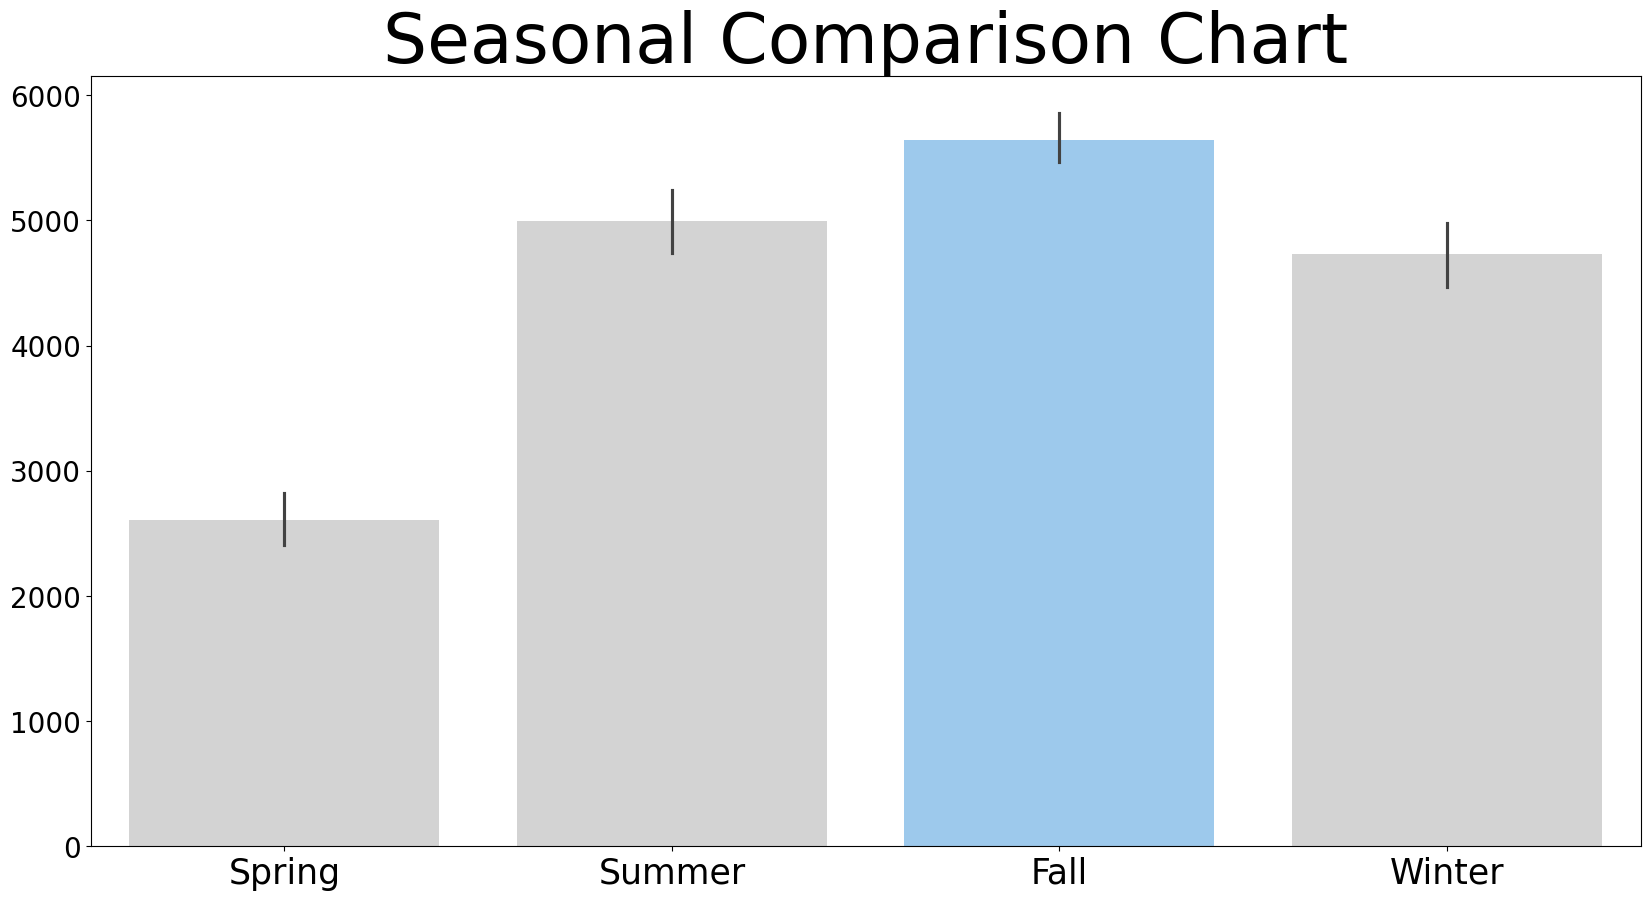

In [554]:
# Season based on Bike Rental Charts

colors = ["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    y="count_cr",
    x="season",
    data=days_bike_rent_df.sort_values(by="season", ascending=False),
    hue="season",
    palette=colors,
    ax=ax,
    legend=False
)

ax.set_title("Seasonal Comparison Chart", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=20)

plt.show()

The season with the most rentals is the Fall season with a total of 1061129 rentals in the fall.

### What time of day are most and least rented?

In [555]:
# grouping hours with count_cr
sum_order_items_df = hours_bike_rent_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

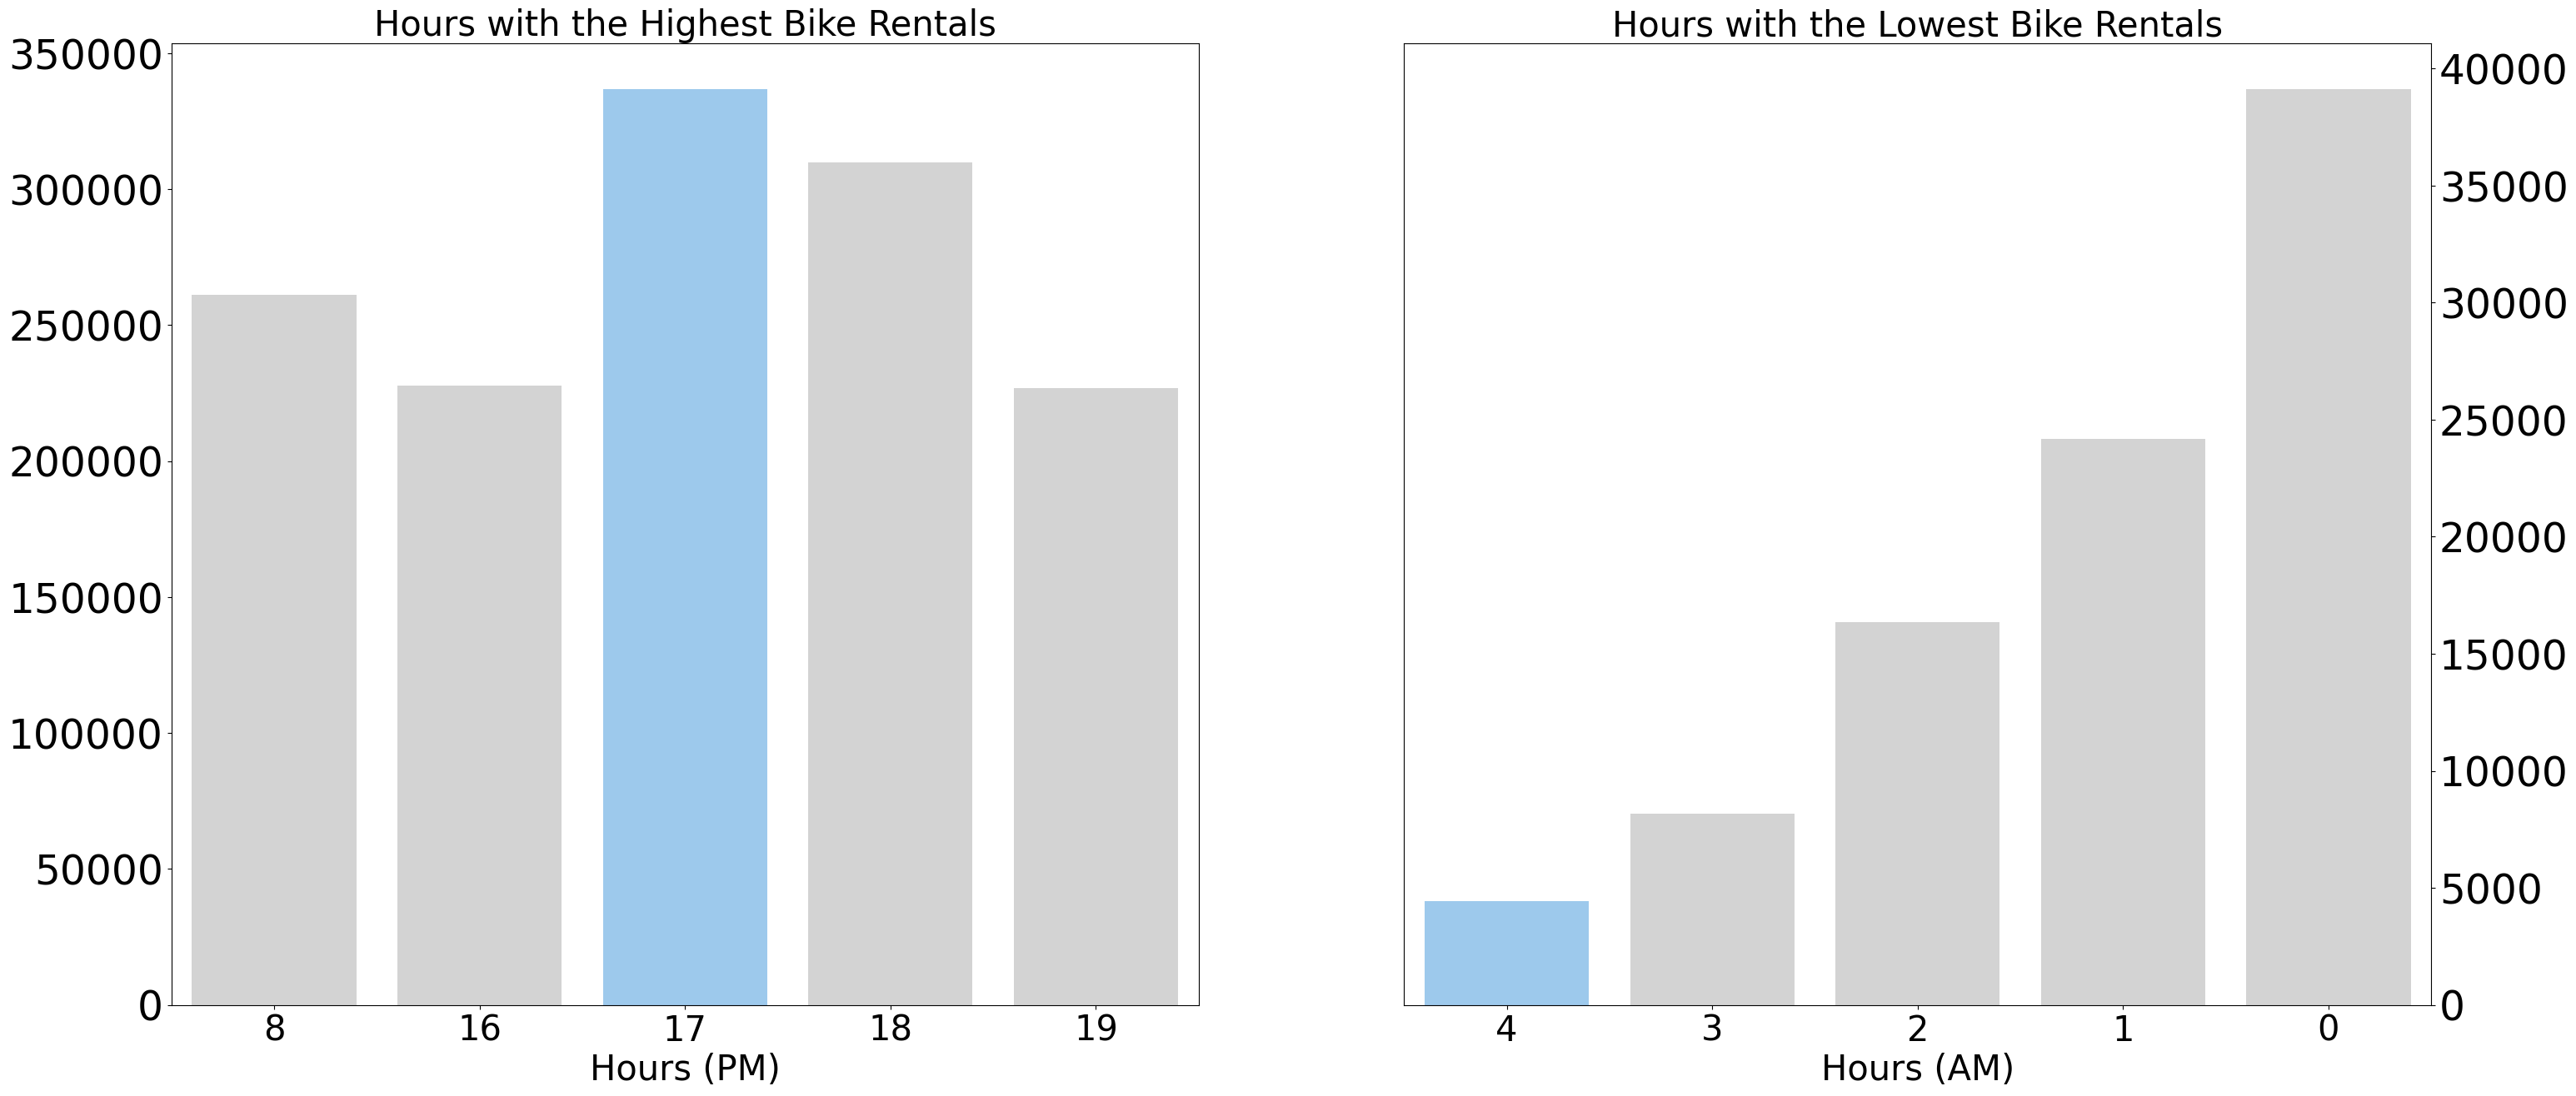

In [556]:
# Bar chart to visualize differences in bike rentals based on time of day
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), hue="hours",
            palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0], legend=False)

ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Hours with the Highest Bike Rentals", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5),
            hue="hours", palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9"], ax=ax[1], legend=False)

ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)", fontsize=30)
ax[1].set_title("Hours with the Lowest Bike Rentals", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

plt.show()

Based on the image above, you can see that bicycle rentals are most used at 17:00, around 336860 rentals. In contrast to this, rentals at 04:00 were the least sold product with around 4428 rentals.


### How many people choose registered compared to casual?



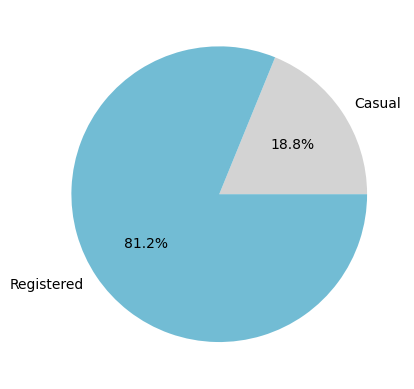

In [557]:
# Comparison of Registered and Casual Customers Chart

total_casual_rent = sum(days_bike_rent_df['casual'])
total_registered_rent = sum(days_bike_rent_df['registered'])

data = [total_casual_rent, total_registered_rent]
labels = ['Casual', 'Registered']
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

plt.show()

from this chart, customer who registered is 81.2% while customer who has not registered or casual is 18.8%

### How has the company's sales performance been in recent years?

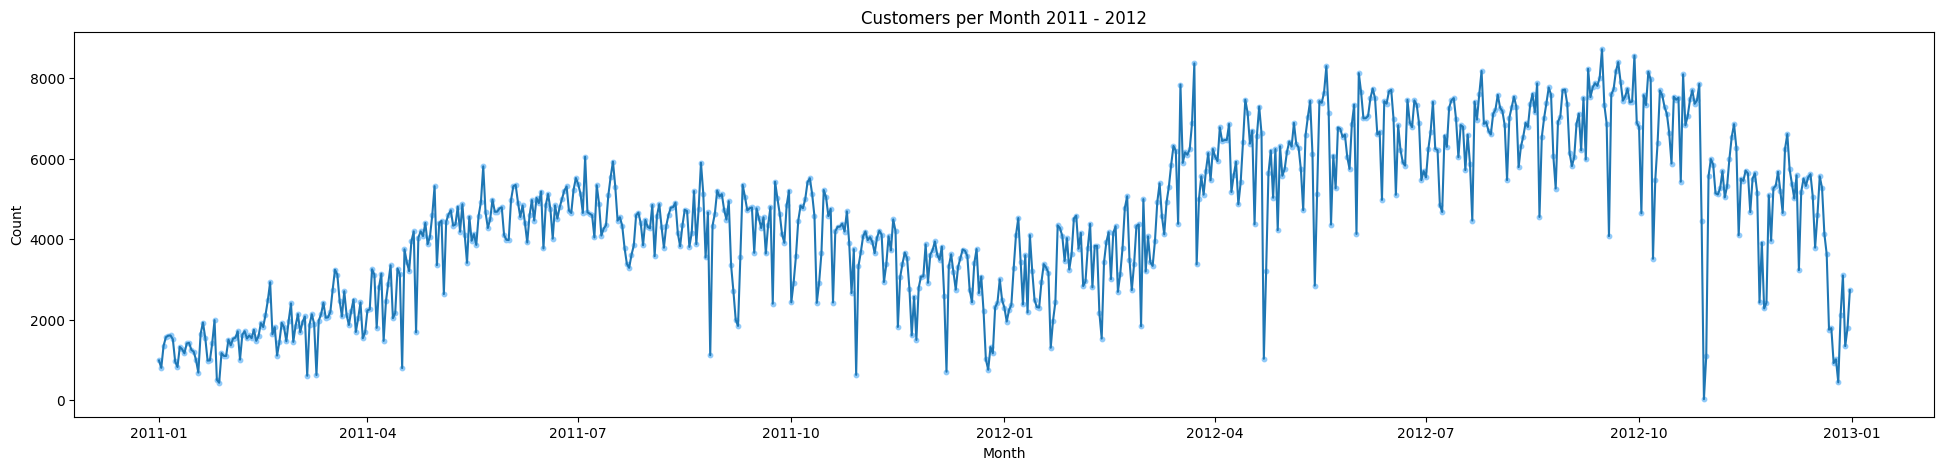

In [558]:
# company's sales performance Chart

plt.figure(figsize=(24, 5))
monthly_counts = days_bike_rent_df['count_cr'].groupby(days_bike_rent_df['dteday']).max()
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')

plt.plot(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Customers per Month 2011 - 2012')

plt.show()

Based on the visualization above, we can see that the highest number of orders occurred in September. Apart from that, we can also see a significant decrease in the number of orders in November and December.

## What indicators influence the number of bike rentals?

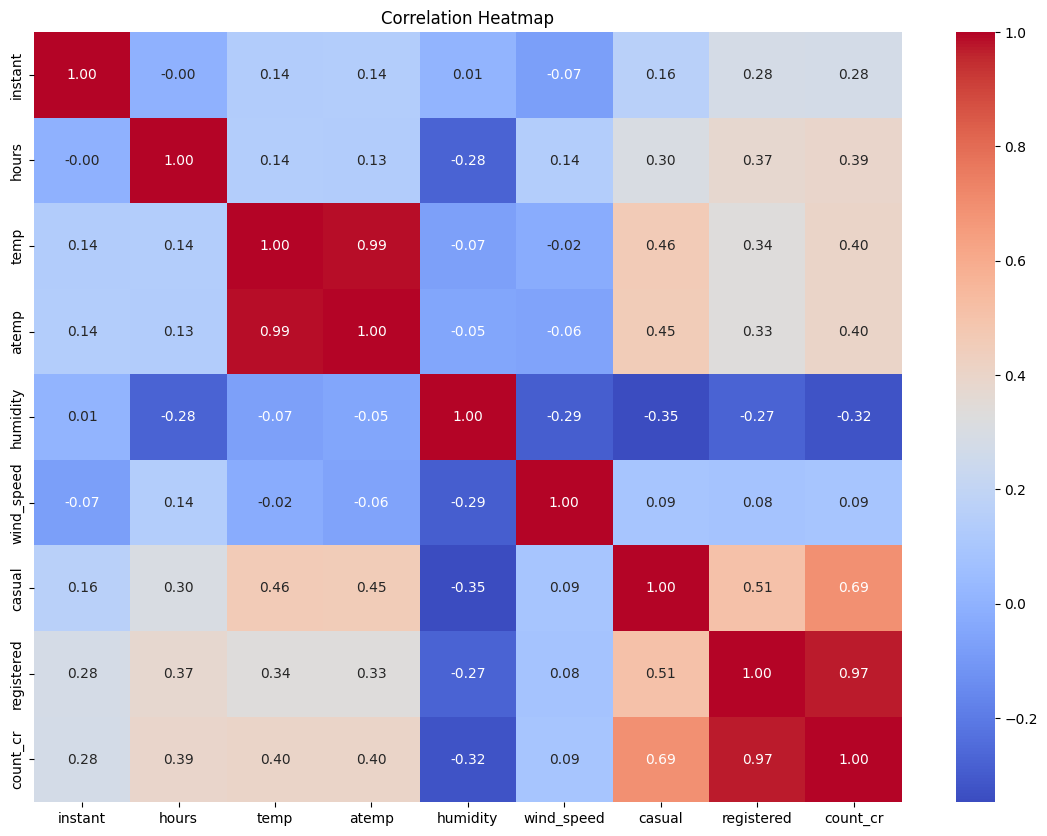

In [559]:
# Rent Correlation Heatmap

numeric_df = hours_bike_rent_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

From this heatmap, both actual and apparent temperatures are positively correlated with the number of casual users, which likely reflects seasonal and weather-driven variations in casual bike rentals.

## Conclusion

Question:<br>
    - In what season are there most bicycle rentals? <br>
    - At what time are the most and least bicycle rentals?  <br>
    - How many people choose registered compared to casual? <br>
    - How has the company's sales performance been in recent years? <br>
    - What indicators influence the number of bike rentals? <br>

- Conclusion question 1: Bike Rent have peak demand in the Fall season.
- Conclusion question 2: Based on the image above, you can see that bicycle rentals are most frequently used at 17:00. In contrast, 04:00 rentals are the least sold product.  
- Conclusion question 3: Customer who registered is 81.2% while customer who has not registered or casual is 18.8%.
- Conclusion question 4: Based on the visualization above, we can see that the highest number of orders occurred in September 2012. Apart from that, we can also see a significant decrease in the number of orders in January 2011.
- Conclusion question 5: base on heatmap above, both actual and apparent temperatures are positively correlated with the number of casual users, that reflects seasonal and weather-driven variations in casual bike rentals.

## Apply advanced analysis techniques

### 1. Clustering Analysis

Using advanced analysis techniques in the form of clustering analysis

#### Total Users Based on Air Humidity

In [560]:
hours_bike_rent_df.groupby(by="humidity_category").agg({
    "count_cr": ["count"]})

,count_cr
,count
humidity_category,
Ideal,5505
To Dry,3518
To Humid,8356



we can identify groups of users who are more likely to rent bicycles in too humid conditions

#### Total Users Based on weather_situation

In [561]:
hours_bike_rent_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)

<ipython-input-561-d6060be001df>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_bike_rent_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)


,count_cr
weather_situation,
Clear,848
Misty,649
Light_rainsnow,368
Heavy_rainsnow,3


we can identify groups of users who are more likely to rent bicycles on clear days

### 2. RFM Analysis

The RFM Analysis below is used to understand customer behavior from three main factors:
* Recency **how recently the customer interacted with the business**
* Frequency **number of customers interacting**
* Monetary **the amount of money they use**

In [562]:
current_date = max(hours_bike_rent_df['dteday'])
rfm_df = hours_bike_rent_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,
    'instant': 'count',
    'count_cr': 'sum'
}).reset_index()

rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


## Saving cleaned dataset

In [563]:
# Check if the files exist and delete them if they do
if os.path.exists(hours_clean_dataset):
    os.remove(hours_clean_dataset)
if os.path.exists(day_clean_dataset):
    os.remove(day_clean_dataset)

# Save the DataFrames to CSV
hours_bike_rent_df.to_csv(hours_clean_dataset, index=False)
days_bike_rent_df.to_csv(day_clean_dataset, index=False)

Data saved into **dataset/** directory. This clean data is ready to used into Dashboard.